In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = ['Computer Modern Sans']
plt.rcParams['text.latex.preamble'] = '\\usepackage[cm]{sfmath}'
plt.rcParams['font.family'] = 'sans-serif'

In [9]:
data = np.loadtxt("../data/hs_outputs_2.txt")
nqs_en_x, nqs_en_y, analytical_en_x, analytical_en_y = data[:,0], data[:,1], data[:,2], data[:,3]

In [10]:
# Get minimum energies 
unique_true_energies = np.flip(np.unique(analytical_en_y))
ns = np.unique(nqs_en_x)
min_energies = []
for n in ns: 
	energies = []
	for row in data: 
		if row[0] == n: 
			energies.append(row[1])
	print(n, energies)
	min_energies.append(min(energies))

4.0 [-2.158966755310251, -0.9241422354631835, -2.0130496501360007, -2.1586810652557067, -2.156292544625326]
6.0 [-2.5000259971029175, -2.102309154710438, -2.8096113020528284, -2.8149830260694713]
8.0 [-3.531061614018737, -3.5269602459438025, -3.567640790480559, -2.5816845631465757]
10.0 [-4.31712572406295, -4.283621869600415, -4.311176174506953, -4.307976421536572]
12.0 [-5.030298482720978, -5.073449615099989, -5.048872277497113]
14.0 [-5.80168536248204, -3.6145965084172995]
16.0 [-6.659283300146598, -6.703379102975063]
18.0 [-6.973611402943512, -7.480554227082033]
20.0 [-6.704997408460153, -8.314613210235676]
22.0 [-8.765725595858282, -8.088983942189785]
24.0 [-9.02822342839539, -9.372802898054873]
26.0 [-10.328045572213277, -10.719377716920736]
28.0 [-7.582863002781313, -10.056041986267712]
30.0 [-11.525799002890802]


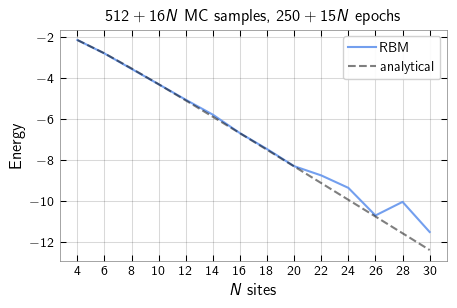

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(ns, min_energies, label="RBM", color='cornflowerblue', alpha=0.9) 
ax.plot(ns, unique_true_energies, label="analytical", color='black', linestyle='dashed', alpha=0.5) 
ax.set_xticks(np.unique(nqs_en_x))
ax.set_xlabel('$N$ sites')
ax.set_ylabel('Energy')
ax.legend()
ax.set_title('$ 512 + 16N$ MC samples, $250 + 15N$ epochs')
plt.savefig('hs_nqs.pdf')

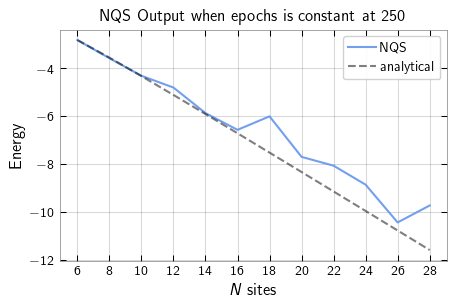

In [7]:
### Basically the same as above but for constant number of epochs
data_const = np.loadtxt("../data/hs_outputs_3.txt", skiprows=1)
nqs_en_x_const, nqs_en_y_const, analytical_en_x_const, analytical_en_y_const = data_const[:,0], data_const[:,1], data_const[:,2], data_const[:,3]

unique_true_energies_const = np.flip(np.unique(analytical_en_y_const))
ns_const = np.unique(nqs_en_x_const)
min_energies_const = []
for n in ns_const: 
	energies = []
	for row in data_const: 
		if row[0] == n: 
			energies.append(row[1])
	min_energies_const.append(min(energies))

fig_const, ax_const = plt.subplots(figsize=(5,3))
ax_const.set_title("NQS Output when epochs is constant at 250")
ax_const.plot(ns_const, min_energies_const, label="NQS", color='cornflowerblue', alpha=0.9) 
ax_const.plot(ns_const, unique_true_energies_const, label="analytical", color='black', linestyle='dashed', alpha=0.5) 
ax_const.set_xticks(nqs_en_x_const)
ax_const.set_xlabel('$N$ sites')
ax_const.set_ylabel('Energy')
plt.legend()
plt.savefig('hs_nqs_const.pdf')


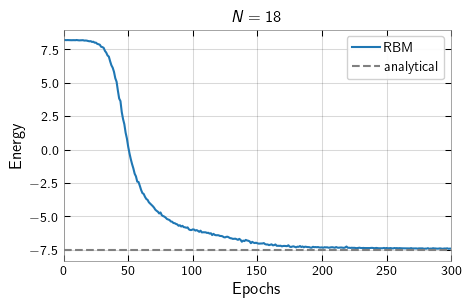

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
data = np.loadtxt("../data/hs_outputs_4.txt")
iters = np.arange(len(data))
ax.plot(iters, data, linestyle='-', label='RBM')
ax.hlines(-np.pi**2 * (18+ 5/18)/24, 0, len(data), linestyles='dashed', color='gray', label='analytical')
ax.set_xlabel('Epochs')
ax.set_xlim(0, 300)
ax.set_ylabel('Energy')
ax.set_title('$N=18$')
ax.legend()
plt.savefig('hs_nqs_iters.pdf')